<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Abalone-dataset" data-toc-modified-id="Abalone-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Abalone dataset</a></span></li></ul></div>

### Abalone dataset


Scaricare il file nella sezione download dal sito di UCI: http://archive.ics.uci.edu/ml/datasets/Abalone.

Dopo averlo esplorato attraverso un' EDA, rispondi per iscritto alle seguenti domande giustificandole:

- Quale potrebbe essere la colonna target da predire? 
- Si tratta di un problema di regressione o di classificazione? 
- E' possibile in questo caso trasformare un problema di regressione in uno di classificazione e viceversa? 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    pass


In [2]:
df = pd.read_csv("abalone.data")
df.columns = ["Sex", "Length",  "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]

In [12]:
df = df.rename(columns=lambda x: x.lower())
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


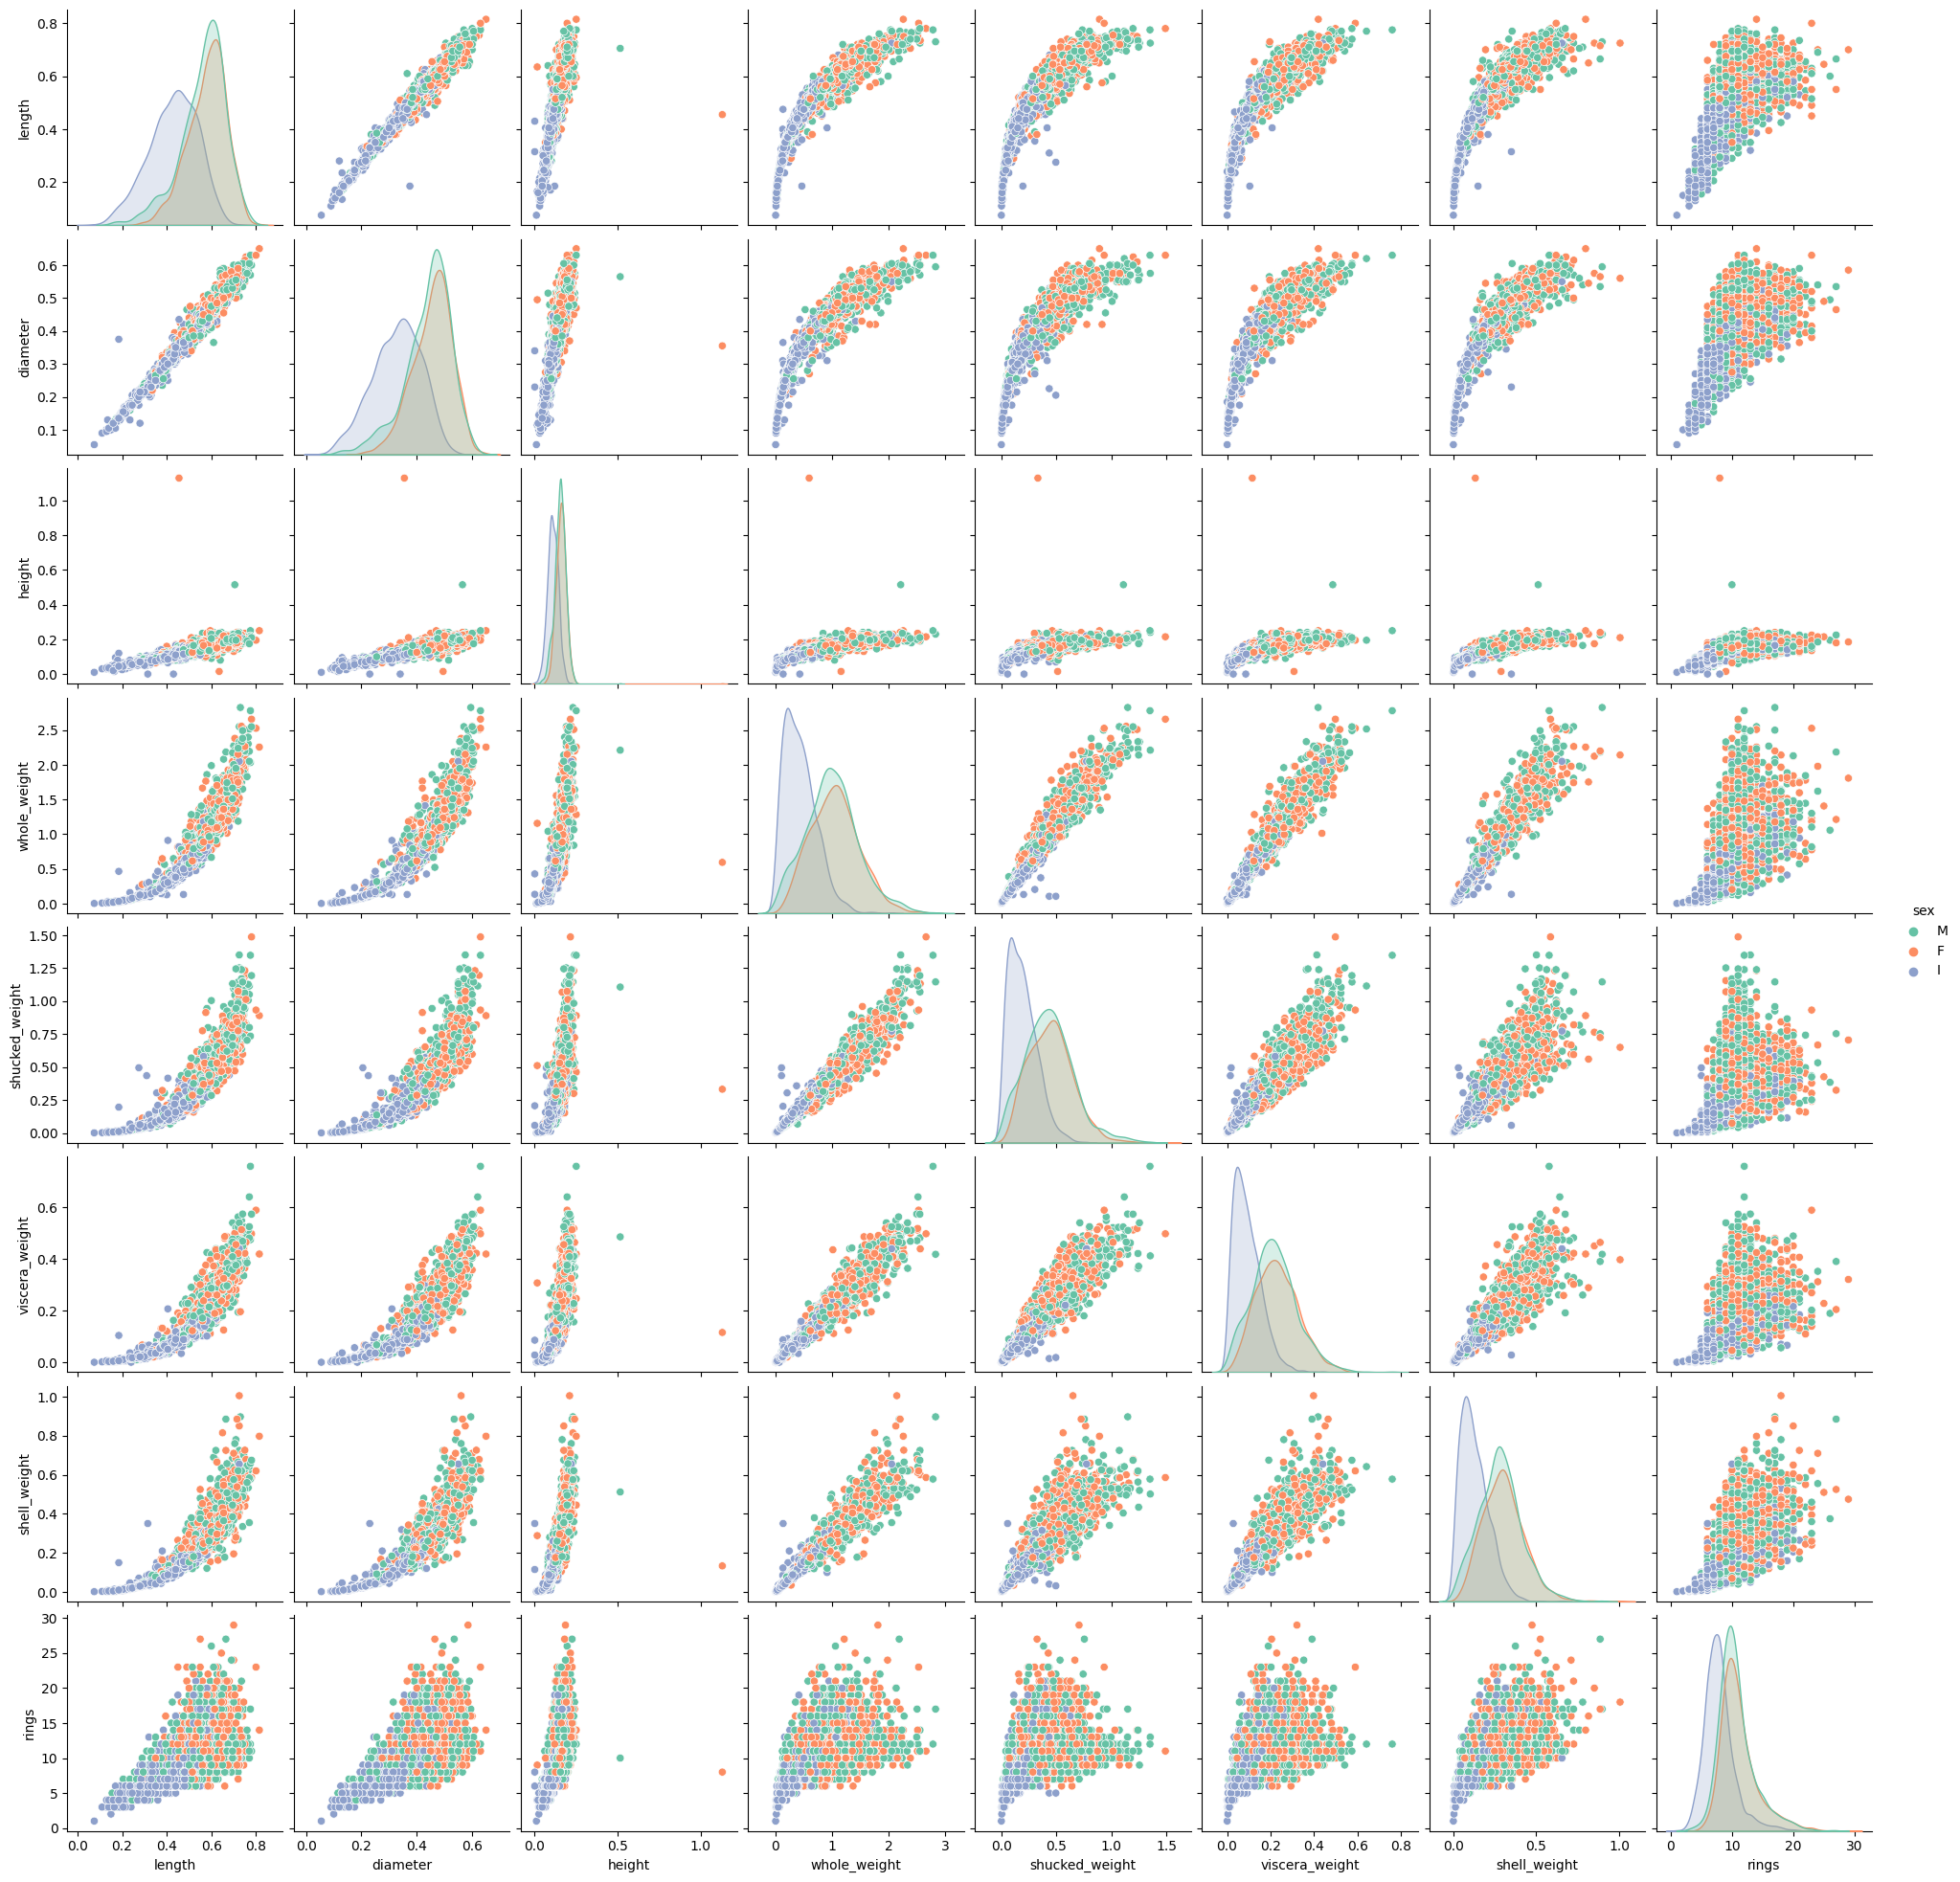

In [5]:
sns.pairplot(df, hue="sex", palette="Set2")

It is a classification problem. Because we have to predict if the abalone is male or female.

But there isn't an objective difference between Male and Female abalone (even in the weight histogram).

So we'll use a decision tree to predict the gender of the abalone.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as met

y_encoded = LabelEncoder().fit_transform(df['sex'])

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, "length":], y_encoded, test_size = 0.2, random_state=1)

In [24]:
# Ottengo un dataframe partendo dal dizionario
# con i valori dei test sulle performance del modello

def dict_to_df(dic):
    df = pd.DataFrame(columns=['type', 'function', 'depth', 'feature', 'value'])

    for f in dic.keys():
        for depth in dic[f].keys():
            for type in list(dic[f][depth].keys())[:2]:
                for feature in dic[f][depth][type].keys():
                    df.loc[len(df)] = [type, f, depth, feature, dic[f][depth][type][feature]]
            
    return df

### Model performance without scaling

In [25]:
# Faccio i test del modello con i diversi iper-parametri
# e salvo i risultati in un dizionario

results = {}

for f in ['entropy', 'gini', 'log_loss']:
    results[f] = dict()

    for depth in range(2, 20):
        tree = DecisionTreeClassifier(criterion=f, max_depth=depth, min_samples_split=2, random_state=1)
        tree = tree.fit(X_train, y_train)

        y_test_pred  = tree.predict(X_test)
        y_train_pred = tree.predict(X_train)

        results[f][depth] = met.classification_report(y_test, y_test_pred, output_dict=True)

/home/lorenzo/miniconda3/envs/datas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lorenzo/miniconda3/envs/datas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lorenzo/miniconda3/envs/datas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le